In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from pyMPM import MPM

In [3]:
plt.style.use('seaborn')

# Plot attenuation for dry air and air with 50% and 100% relative humidity 

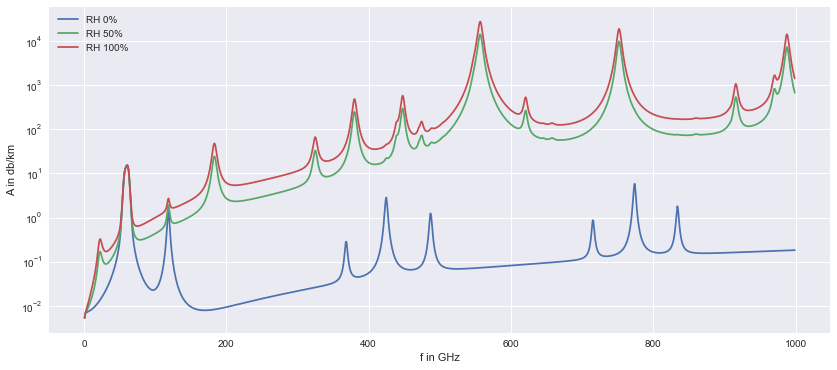

In [4]:
fig, ax = plt.subplots(figsize=(14,6))

f = np.arange(1,1000)    # Vector of frequencies in GHz
T = 15                # Air temperature in degree Celcius
P = 1013              # Air pressiure in mbar
RH_vec = [0, 50, 100] # List of relative humidity values used for plotting

for RH in RH_vec:
    A = MPM(f, P, T, RH, 0, 0, 0, 'att')
    ax.semilogy(f,A, label='RH ' + str(RH) + '%')

ax.set_xlabel('f in GHz')
ax.set_ylabel('A in db/km')
plt.legend(loc=2)

# Plot dispersive delay for dry air and air with 50% and 100% relative humidity 

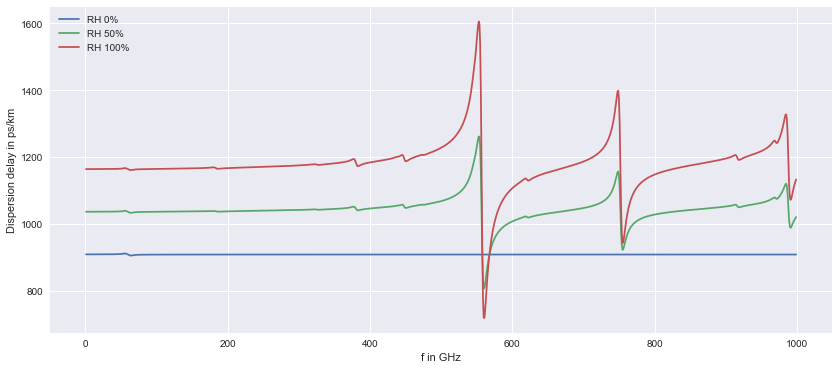

In [5]:
fig, ax = plt.subplots(figsize=(14,6))

for RH in RH_vec:
    D = MPM(f, P, T, RH, 0, 0, 0, 'del')
    ax.plot(f,D, label='RH ' + str(RH) + '%')

ax.set_xlabel('f in GHz')
ax.set_ylabel('Dispersion delay in ps/km')
plt.legend(loc=2)

# Plot as above, but leave out the non-dispersive part
This reproduces the Figure 2 in  
`
H.J. Liebe, G.A. Hufford, M.G. Cotton, "Propagation modeling of moist air and suspended water/ice particles at frequencies below 1000 GHz" Proc. NATO/AGARD Wave Propagation Panel, 52nd meeting, No. 3/1-10, Mallorca, Spain, 17 - 20 May, 1993
`

(-200, 200)

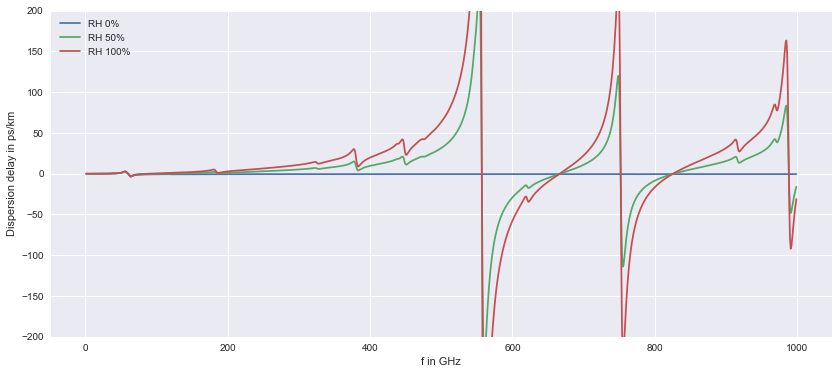

In [6]:
fig, ax = plt.subplots(figsize=(14,6))

for RH in RH_vec:
    D = MPM(f, P=1013, T=15, U=RH, wa=0, wae=0, R=0, output_type='del')
    ax.plot(f,D-D[0], label='RH ' + str(RH) + '%')

ax.set_xlabel('f in GHz')
ax.set_ylabel('Dispersion delay in ps/km')
plt.legend(loc=2)

ax.set_ylim([-200, 200])